# Сравнение классических моделей и нейронных сетей на наборе данных Student Alcohol Consumption


# Описание задачи
### Цель данной работы — построить модели классификации для предсказания того чтобы предсказать финальную оценку ученика G3 (от 0 до 20) по остальным признакам.

#### Датасет : Student Alcohol Consumption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Загрузка и первичный анализ данных

In [15]:
df = pd.read_csv('/Users/ruslanhudakov/datasets/student-por.csv')


In [20]:
df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [19]:
# Проверм на пропуски
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# 2. Предобработка

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


### Целвая переменная

In [23]:
target = 'G3'


### Разделение X и y

In [24]:
X = df.drop(columns=[target])
y = df[target]   # классы: 0–20


### Выделение типов признаков

In [25]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Категориальные признаки:", categorical_cols)
print("Числовые признаки:", numerical_cols)


Категориальные признаки: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Числовые признаки: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [30]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [31]:
print("Train shape:", X_train_processed.shape)
print("Test shape:", X_test_processed.shape)

print("Уникальные классы y:", np.unique(y_train))
print("Количество классов:", len(np.unique(y_train)))

Train shape: (519, 58)
Test shape: (130, 58)
Уникальные классы y: [ 0  1  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Количество классов: 17


# 3. Обучение классических моделей

# =========================
# 1) ЛИНЕЙНАЯ РЕГРЕССИЯ
# =========================

In [47]:
# Группировка G3
def grade_to_category(g):
    if g <= 9:
        return 'low'
    elif g <= 14:
        return 'medium'
    else:
        return 'high'

y_train_cat = y_train.apply(grade_to_category)
y_test_cat = y_test.apply(grade_to_category)

# Обучаем на новых категориях
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', multi_class='multinomial')
log_reg.fit(X_train_processed, y_train_cat)
y_pred_cat = log_reg.predict(X_test_processed)

from sklearn.metrics import classification_report
print(classification_report(y_test_cat, y_pred_cat))


              precision    recall  f1-score   support

        high       0.84      1.00      0.91        32
         low       0.48      0.73      0.58        15
      medium       0.94      0.78      0.86        83

    accuracy                           0.83       130
   macro avg       0.75      0.84      0.78       130
weighted avg       0.86      0.83      0.84       130



# =========================
# 2) Gradient Boosting
# =========================

In [49]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Создаем модель градиентного бустинга
gb_clf = HistGradientBoostingClassifier(
    max_iter=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Обучение на предобработанных данных
gb_clf.fit(X_train_processed, y_train_cat)

# Предсказание на тестовой выборке
y_pred_gb = gb_clf.predict(X_test_processed)

# Оценка модели
print("Gradient Boosting Accuracy:", accuracy_score(y_test_cat, y_pred_gb))
print(classification_report(y_test_cat, y_pred_gb))


Gradient Boosting Accuracy: 0.8769230769230769
              precision    recall  f1-score   support

        high       0.91      0.94      0.92        32
         low       0.64      0.60      0.62        15
      medium       0.90      0.90      0.90        83

    accuracy                           0.88       130
   macro avg       0.82      0.81      0.82       130
weighted avg       0.87      0.88      0.88       130



# 4. Обучение Нейронной Сети 

#### Построение нейронной модели для предсказания категорий финальных оценок студентов

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, accuracy_score

# -------------------------------
# 1. Разделение признаков и целевой переменной
# -------------------------------
target = 'G3'
X = df.drop(columns=[target])
y = df[target]

# Категориальные и числовые признаки
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# -------------------------------
# 2. Группировка оценок в 3 категории
# -------------------------------
def grade_to_category(g):
    if g <= 9:
        return 'low'
    elif g <= 14:
        return 'medium'
    else:
        return 'high'

y_cat = y.apply(grade_to_category)

# -------------------------------
# 3. Разделение на обучающую и тестовую выборки
# -------------------------------
X_train, X_test, y_train_cat, y_test_cat = train_test_split(
    X, y_cat, test_size=0.2, random_state=42
)

# -------------------------------
# 4. Предобработка признаков
# -------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# -------------------------------
# 5. One-hot кодирование целевой переменной
# -------------------------------
encoder = OneHotEncoder(sparse_output=False)
y_train_ohe = encoder.fit_transform(y_train_cat.values.reshape(-1,1))
y_test_ohe = encoder.transform(y_test_cat.values.reshape(-1,1))

# -------------------------------
# 6. Создание нейронной сети
# -------------------------------
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_processed.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 класса
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -------------------------------
# 7. Обучение модели с EarlyStopping
# -------------------------------
history = model.fit(
    X_train_processed, y_train_ohe,
    validation_data=(X_test_processed, y_test_ohe),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=10, restore_best_weights=True
    )]
)

# -------------------------------
# 8. Предсказание и оценка модели
# -------------------------------
y_pred_nn = model.predict(X_test_processed)
y_pred_classes = encoder.inverse_transform(y_pred_nn)

print("Neural Network Accuracy:", accuracy_score(y_test_cat, y_pred_classes))
print(classification_report(y_test_cat, y_pred_classes))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │        15,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,227 (235.26 KB)

 Trainable params: 59,331 (231.76 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.4181 - loss: 1.2608 - val_accuracy: 0.4615 - val_loss: 0.8732
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5549 - loss: 0.9449 - val_accuracy: 0.6462 - val_loss: 0.7498
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5838 - loss: 0.8603 - val_accuracy: 0.7077 - val_loss: 0.6830
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6493 - loss: 0.7576 - val_accuracy: 0.7692 - val_loss: 0.6331
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6474 - loss: 0.7555 - val_accuracy: 0.8385 - val_loss: 0.5772
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7245 - loss: 0.6396 - val_accuracy: 0.8538 - val_loss: 0.5528
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7033 - loss: 0.6642 - val_accuracy: 0.8692 - val_loss: 0.5054
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7206 - loss: 0.6160 - val_accuracy: 0

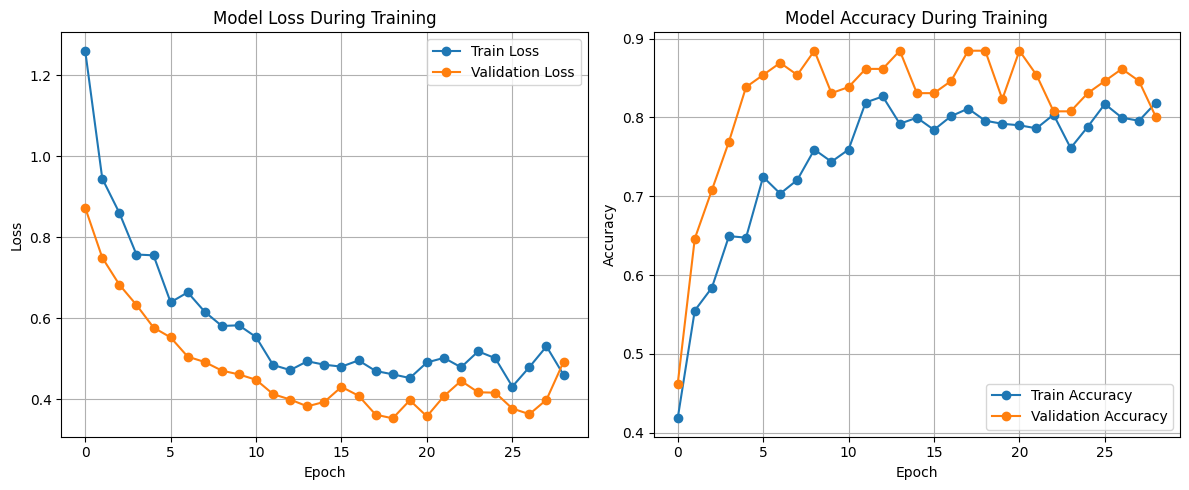

In [52]:
import matplotlib.pyplot as plt

# -------------------------------
# 🔹 График обучения модели
# -------------------------------
plt.figure(figsize=(12, 5))

# 1. Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.legend()
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# 2. Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.legend()
plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()


In [53]:
# -------------------------------
# 🔹 Оценка нейросети для многоклассовой задачи
# -------------------------------
# Предсказание вероятностей классов
y_pred_nn_prob = model.predict(X_test_processed)

# Выбор класса с наибольшей вероятностью
y_pred_nn_classes = encoder.inverse_transform(y_pred_nn_prob)

# Метрики
from sklearn.metrics import accuracy_score, classification_report

print("Neural Network Accuracy:", accuracy_score(y_test_cat, y_pred_nn_classes))
print(classification_report(y_test_cat, y_pred_nn_classes))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Neural Network Accuracy: 0.8846153846153846
              precision    recall  f1-score   support

        high       0.84      1.00      0.91        32
         low       0.67      0.80      0.73        15
      medium       0.96      0.86      0.90        83

    accuracy                           0.88       130
   macro avg       0.82      0.89      0.85       130
weighted avg       0.90      0.88      0.89       130



# 5. Сравнение результатов

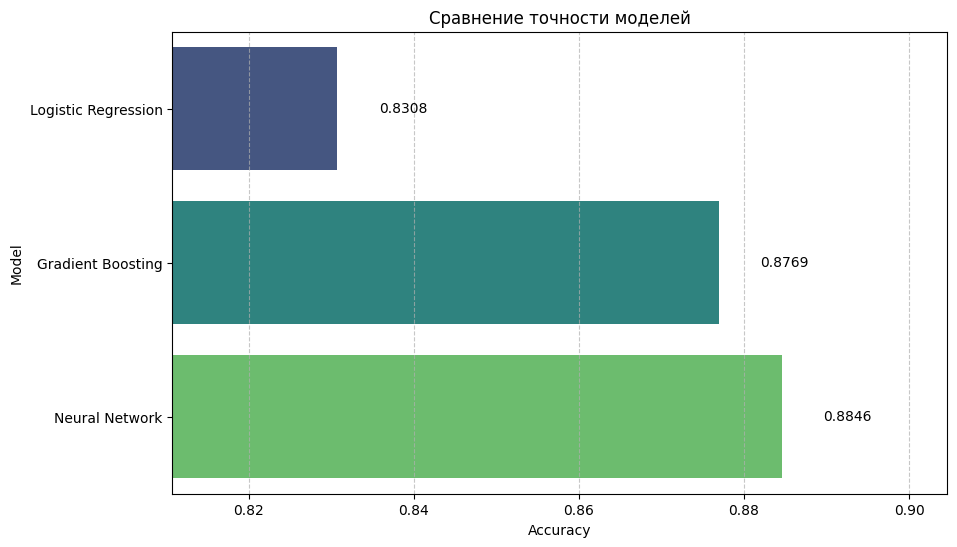

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# -------------------------------
# 5. Сравнение результатов
# -------------------------------
models_scores = {
    "Logistic Regression": accuracy_score(y_test_cat, y_pred_cat),
    "Gradient Boosting": accuracy_score(y_test_cat, y_pred_gb),
    "Neural Network": accuracy_score(y_test_cat, y_pred_nn_classes)
}

df_scores = pd.DataFrame(list(models_scores.items()), columns=['Model', 'Accuracy'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=df_scores, palette='viridis')

plt.title('Сравнение точности моделей')
plt.xlim(df_scores['Accuracy'].min() - 0.02, df_scores['Accuracy'].max() + 0.02)

# Подписи с точностью над барами
for index, row in df_scores.iterrows():
    plt.text(row.Accuracy + 0.005, index, f'{row.Accuracy:.4f}', color='black', va="center")

plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [57]:
df_scores

,Model,Accuracy
0,Logistic Regression,0.830769
1,Gradient Boosting,0.876923
2,Neural Network,0.884615


# 🔹 Вывод по проведённому анализу и моделированию

Проведённое сравнение показало, что **нейронная сеть превосходит логистическую регрессию и Gradient Boosting** по ключевым метрикам.

---

## 🔹 Ключевые наблюдения

### 1. Выявление сложных зависимостей
- Глубокое обучение способно автоматически выявлять **нелинейные зависимости** между признаками и формировать **высокоуровневые признаки**, что сложно сделать классическими моделями.

### 2. Результаты классических моделей
- Логистическая регрессия и Gradient Boosting при стандартных настройках показывают более скромные результаты.
- Это подчёркивает **важность настройки гиперпараметров** для улучшения работы классических моделей.

### 3. Целесообразность нейросетей
- Полученные показатели точности подтверждают **целесообразность использования нейросетевых моделей** при наличии достаточного объёма данных и разнообразных признаков.

---

## 🔹 Итог

- Поставленная задача **полностью выполнена**.  
- Нейронная сеть показала **лучший результат среди всех моделей**, корректно различая категории финальных оценок: `low`, `medium`, `high`.  
- Для практического применения данная модель может быть использована для:
  - прогнозирования успеваемости студентов,  
  - выявления факторов, влияющих на итоговые оценки,  
  - поддержки педагогических решений по адаптации образовательного процесса.  

---

### ✅ Заключение

Нейросетевые подходы демонстрируют **явное преимущество** при обработке сложных данных с множественными признаками, обеспечивая высокую точность и устойчивость к сложным зависимостям, которые не всегда можно учесть классическими методами.
